In [389]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import numpy as np

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [390]:
import matplotlib.pyplot as plt
import seaborn as sns

In [391]:
import pandas as pd

train = pd.read_csv("../../../data/Parking_Demand_Daniel/train_df_errno.csv")
test = pd.read_csv("../../../data/Parking_Demand_Daniel/test_df.csv")
sub = pd.read_csv("../../../data/Parking_Demand_Daniel/sample_submission.csv")
age = pd.read_csv("../../../data/Parking_Demand_Daniel/age_gender_info.csv")

train.shape, test.shape, sub.shape, age.shape

((2896, 15), (1008, 14), (150, 2), (16, 23))

### 컬럼명 변경

In [392]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', 
                 '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', 
                 '임대료', '지하철', '버스', '단지내주차면수', '등록차량수']

test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', 
                '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', 
                '임대료', '지하철', '버스', '단지내주차면수']

### 결측치 확인

In [393]:
train.isna().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       569
임대료         569
지하철         211
버스            4
단지내주차면수       0
등록차량수         0
dtype: int64

In [394]:
test.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          2
임대보증금       180
임대료         180
지하철          38
버스            0
단지내주차면수       0
dtype: int64

##### 결측치 처리 ) 1. 자격유형

In [395]:
test.loc[test['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0


In [396]:
grouped = test.groupby(['단지코드', '임대건물구분', '지역'])
group1 = grouped.get_group(('C2411', '아파트', '경상남도'))
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,100720,0.0,2.0,840.0
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,100720,0.0,2.0,840.0
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,100720,0.0,2.0,840.0
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,171480,0.0,2.0,840.0


In [397]:
test.loc[196, '자격유형'] = 'A'

In [398]:
group2 = grouped.get_group(('C2253', '아파트', '강원도'))
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,83020,0.0,2.0,173.0
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,83020,0.0,2.0,173.0


In [399]:
test.loc[258,'자격유형'] = 'C'

In [400]:
test.loc[test['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수


##### test 자격유형 결측치 처리 완료

##### 결측치 처리 ) 2. 버스

In [401]:
train.corr()['버스']

총세대수       -0.002773
전용면적       -0.005071
전용면적별세대수    0.045394
공가수         0.043936
지하철         0.097503
버스          1.000000
단지내주차면수     0.073013
등록차량수       0.104135
Name: 버스, dtype: float64

In [402]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
group1['버스'].mean()

3.996268656716418

In [403]:
val = group1['버스'].mean()
train.loc[ train['버스'].isnull(), '버스'] = val
train.loc[train['버스'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수


In [404]:
test.loc[ test['버스'].isnull(), '버스'] = val
test.loc[test['버스'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수


##### 결측치 처리 ) 3. 지하철

In [405]:
grouped = train.groupby('지역')['지하철']
mean_sub = grouped.mean()
mean_sub.values

array([0.        , 0.2076412 , 0.        , 0.        , 0.        ,
       0.46078431, 0.72254335, 0.53353659, 0.1875    , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [406]:
mean_sub.index

Index(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도'],
      dtype='object', name='지역')

In [407]:
for sido, index_sido in zip(mean_sub.index, mean_sub.values):
    a = train[(train["지하철"].isnull()) & (train["지역"] == sido)].index
    train.loc[a, "지하철"] = index_sido
    b = test[(test["지하철"].isnull()) & (test["지역"] == sido)].index
    test.loc[b, "지하철"] = index_sido

In [408]:
train["지하철"].value_counts()

0.000000    2364
1.000000     400
0.722543      93
2.000000      33
3.000000       6
Name: 지하철, dtype: int64

In [409]:
test["지하철"].value_counts()

0.000000    904
1.000000     64
2.000000     35
0.722543      5
Name: 지하철, dtype: int64

##### 결측치 처리 ) 4.  임대료 & 임대보증금

In [410]:
grouped = train.groupby(['임대보증금'])
group1 = grouped.get_group( ('-')  ) # '-' 값을 그룹화
a=group1.index
for x in a:
    train.loc[x,'임대보증금']=0

grouped1 = train.groupby(['임대료'])
group2 = grouped1.get_group( ('-')  ) #흠.....
a=group2.index
for x in a:
    train.loc[x,'임대료']=0

In [411]:
grouped = test.groupby(['임대보증금'])
group1 = grouped.get_group( ('-')  ) # '-' 값을 그룹화
a=group1.index
for x in a:
    test.loc[x,'임대보증금']=0

grouped1 = test.groupby(['임대료'])
group2 = grouped1.get_group( ('-')  )
a=group2.index
for x in a:
    test.loc[x,'임대료']=0 

In [412]:
train['임대보증금']=train['임대보증금'].fillna(0) #일단 전처리보다 머신러닝의 능력을 확인하기 위해서 일단 결측치 다 0!
test['임대보증금']=test['임대보증금'].fillna(0) #일단 전처리보다 머신러닝의 능력을 확인하기 위해서 일단 결측치 다 0!

train['임대료']=train['임대료'].fillna(0)
test['임대료']=test['임대료'].fillna(0)

### 정규화를 위한 '임대보증금'= 0을 지역별 mean()으로 처리 - ㅠㅠ 못함

### 정규화를 위한 '임대료'= 0을 지역별 mean()으로 처리 - ㅠㅠ 못함

In [413]:
train['임대보증금'] = train['임대보증금'].astype('float32') #뒤에서 상관관계 보기 위해서 type 바꿔주기!
test['임대보증금'] = test['임대보증금'].astype('float32')

train['임대료'] = train['임대료'].astype('float32')
test['임대료'] = test['임대료'].astype('float32')

In [414]:
train.isna().sum()

단지코드        0
총세대수        0
임대건물구분      0
지역          0
공급유형        0
전용면적        0
전용면적별세대수    0
공가수         0
자격유형        0
임대보증금       0
임대료         0
지하철         0
버스          0
단지내주차면수     0
등록차량수       0
dtype: int64

(array([ 12.,   6.,  85., 180., 352., 314., 649., 781., 399., 118.]),
 array([2.56494936, 3.09283929, 3.62072921, 4.14861914, 4.67650907,
        5.204399  , 5.73228893, 6.26017885, 6.78806878, 7.31595871,
        7.84384864]),
 <BarContainer object of 10 artists>)

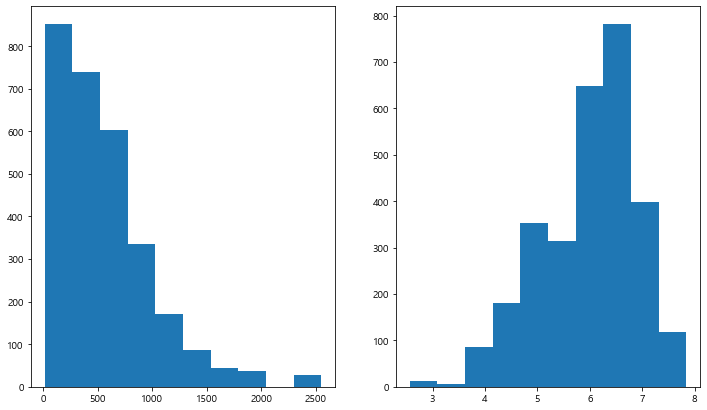

In [415]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,7))

ax1.hist(train['등록차량수'])
ax2.hist(np.log(train['등록차량수']))

### 등록차량수가 빠진 train 데이터 셋과 test 셋을 합친다.

In [416]:
all_df = pd.concat([train, test], join='inner')
all_df 

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000.0,82940.0,0.0,3.0,624.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000.0,107130.0,0.0,3.0,624.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000.0,107130.0,0.0,3.0,624.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000.0,149760.0,0.0,3.0,624.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000.0,149760.0,0.0,3.0,624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,0.0,0.0,0.0,1.0,467.0
1004,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000.0,106400.0,0.0,2.0,300.0
1005,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000.0,106400.0,0.0,2.0,300.0
1006,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000.0,144600.0,0.0,2.0,300.0


In [417]:
all_df[all_df['단지코드'].isna()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수


### 라벨인코딩

In [418]:
gubun1 = {'아파트':1, '상가':2}

gubun2 = {'경상남도':1, '대전광역시':2, '경기도':3, '전라북도':4, 
          '강원도':5, '광주광역시':6, '충청남도':7, '부산광역시':8, 
          '제주특별자치도':9, '울산광역시':10, '충청북도':11, '전라남도':12, 
          '경상북도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}

gubun3 = {'국민임대':1, '공공임대(50년)':2, '영구임대':3, '임대상가':4, 
          '공공임대(10년)':5, '공공임대(분납)':6, '장기전세':7, '공공분양':8, 
          '행복주택':9, '공공임대(5년)':10}

all_df['임대건물구분_lbl'] = all_df['임대건물구분'].map(gubun1)
all_df['지역_lbl'] = all_df['지역'].map(gubun2)
all_df['공급유형_lbl'] = all_df['공급유형'].map(gubun3)

all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000.0,82940.0,0.0,3.0,624.0,1,1,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,1,1,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,1,1,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,1,1,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,0.0,0.0,0.0,1.0,467.0,1,1,9
1004,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000.0,106400.0,0.0,2.0,300.0,1,4,1
1005,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000.0,106400.0,0.0,2.0,300.0,1,4,1
1006,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000.0,144600.0,0.0,2.0,300.0,1,4,1


In [419]:
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }
all_df['자격유형'] =all_df['자격유형'].map(mapping).astype(int)

In [420]:
### 구간분할 해주기(총 세대수에 대해서)

all_df['단지코드'] = all_df['단지코드'].astype("category")
all_df['단지코드_lbl'] = all_df['단지코드'].cat.codes

all_df['qcut_총세대수'] = pd.qcut(all_df['총세대수'], 5, labels=False)
all_df['qcut_총세대수'].unique()

array([1, 3, 2, 4, 0], dtype=int64)

In [421]:
### 구간분할 해주기 (단지내주차면수에 대해서)

all_df['단지내주차면수'] = all_df['단지내주차면수'].astype("category")
all_df['단지내주차면수_lbl'] = all_df['단지내주차면수'].cat.codes

all_df['qcut_단지내주차면수'] = pd.qcut(all_df['단지내주차면수'], 5, labels=False)
all_df['qcut_단지내주차면수'].unique()

array([3, 4, 2, 1, 0], dtype=int64)

### 전용면적별 세대의 합계와 총세대수가 일치하지 않는 오류

* 차이가 14세대 이하인 48개 단지 - ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 'C1584', 'C2298', 'C2225', 'C1218', 'C1970', C1732', 'C2433', 'C1894', 'C1156', 'C2142', 'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189']
* 차이가 94~452세대인 10개 단지(크기순) - ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804’]

In [422]:
group1 = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 
          'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 
          'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 
          'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 
          'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189' ]

for one1 in group1:
    all_df.loc[ all_df['단지코드'] == one1, "단지코드_Type" ] = 1

In [423]:
all_df['단지코드_Type'].unique()

array([nan,  1.])

In [424]:
group2 = ['C1490', 'C2497', 'C2620', 'C1344', 
          'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']

for one2 in group2:
    all_df.loc[ all_df['단지코드'] == one2, "단지코드_Type" ] = 2

In [425]:
all_df['단지코드_Type'].unique()

array([nan,  1.,  2.])

In [426]:
all_df.loc[  all_df['단지코드_Type'].isna(), "단지코드_Type"] = 3
all_df['단지코드_Type'].unique()

array([3., 1., 2.])

### 전용면적을 5의 배수로 변경

In [427]:
all_df['전용면적'] = all_df['전용면적']//5*5


In [428]:
all_df.loc[:,['전용면적']]

,전용면적
0,30.0
1,35.0
2,35.0
3,45.0
4,45.0
...,...
1003,35.0
1004,25.0
1005,25.0
1006,35.0


### 수치화된 컬럼만 뽑아내기

In [429]:
all_df_last = all_df.drop(['임대건물구분', '지역', '공급유형'] , axis=1)
all_df_last

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지내주차면수_lbl,qcut_단지내주차면수,단지코드_Type
0,C2515,545,30.0,276,17.0,1,9216000.0,82940.0,0.0,3.0,624.0,1,1,1,492,1,247,3,3.0
1,C2515,545,35.0,60,17.0,1,12672000.0,107130.0,0.0,3.0,624.0,1,1,1,492,1,247,3,3.0
2,C2515,545,35.0,20,17.0,1,12672000.0,107130.0,0.0,3.0,624.0,1,1,1,492,1,247,3,3.0
3,C2515,545,45.0,38,17.0,1,18433000.0,149760.0,0.0,3.0,624.0,1,1,1,492,1,247,3,3.0
4,C2515,545,45.0,19,17.0,1,18433000.0,149760.0,0.0,3.0,624.0,1,1,1,492,1,247,3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,C1267,675,35.0,126,38.0,12,0.0,0.0,0.0,1.0,467.0,1,1,9,86,2,177,2,1.0
1004,C2189,382,25.0,96,45.0,8,6872000.0,106400.0,0.0,2.0,300.0,1,4,1,381,0,96,1,1.0
1005,C2189,382,25.0,20,45.0,8,6872000.0,106400.0,0.0,2.0,300.0,1,4,1,381,0,96,1,1.0
1006,C2189,382,35.0,202,45.0,8,13410000.0,144600.0,0.0,2.0,300.0,1,4,1,381,0,96,1,1.0


(array([3.266e+03, 4.760e+02, 1.060e+02, 4.500e+01, 4.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.8740e+02, 3.7380e+02, 5.6020e+02, 7.4660e+02,
        9.3300e+02, 1.1194e+03, 1.3058e+03, 1.4922e+03, 1.6786e+03,
        1.8650e+03]),
 <BarContainer object of 10 artists>)

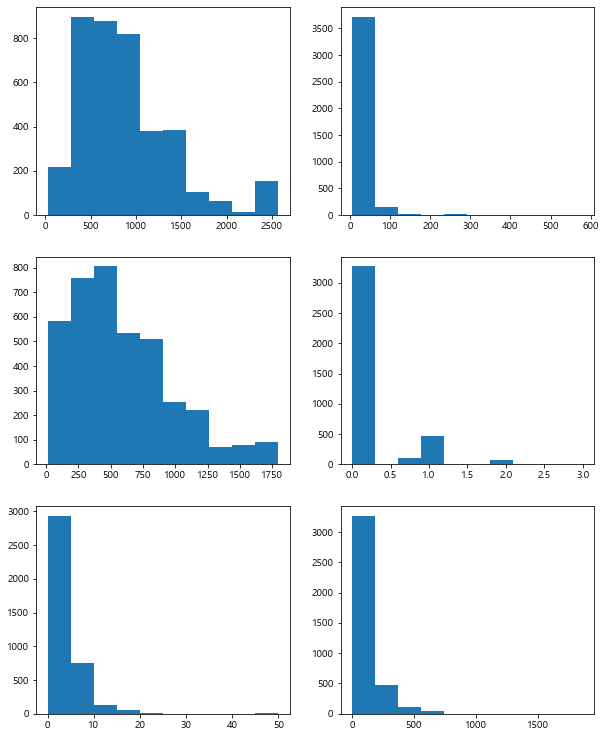

In [430]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,13)) # 히스토그램의 y축은 빈도수

ax[0][0].hist(all_df_last['총세대수'])
ax[0][1].hist(all_df_last['전용면적'])
ax[1][0].hist(all_df_last['단지내주차면수'])
ax[1][1].hist(all_df_last['지하철'])
ax[2][0].hist(all_df_last['버스'])
ax[2][1].hist(all_df_last['전용면적별세대수'])

In [431]:
train_df = all_df_last.iloc[0:2896,:]
test_df = all_df_last.iloc[2896:,:]

train_df.shape, test_df.shape

train_df = pd.concat([train_df, train['등록차량수'] ], axis=1)
train_df

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지내주차면수_lbl,qcut_단지내주차면수,단지코드_Type,등록차량수
0,C2515,545,30.0,276,17.0,1,9216000.0,82940.0,0.0,3.0,624.0,1,1,1,492,1,247,3,3.0,205.0
1,C2515,545,35.0,60,17.0,1,12672000.0,107130.0,0.0,3.0,624.0,1,1,1,492,1,247,3,3.0,205.0
2,C2515,545,35.0,20,17.0,1,12672000.0,107130.0,0.0,3.0,624.0,1,1,1,492,1,247,3,3.0,205.0
3,C2515,545,45.0,38,17.0,1,18433000.0,149760.0,0.0,3.0,624.0,1,1,1,492,1,247,3,3.0,205.0
4,C2515,545,45.0,19,17.0,1,18433000.0,149760.0,0.0,3.0,624.0,1,1,1,492,1,247,3,3.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891,C2532,239,45.0,19,7.0,1,11346000.0,116090.0,0.0,1.0,166.0,1,5,1,501,0,34,0,3.0,146.0
2892,C2532,239,50.0,34,7.0,1,14005000.0,142310.0,0.0,1.0,166.0,1,5,1,501,0,34,0,3.0,146.0
2893,C2532,239,50.0,34,7.0,1,14005000.0,142310.0,0.0,1.0,166.0,1,5,1,501,0,34,0,3.0,146.0
2894,C2532,239,50.0,114,7.0,1,14005000.0,142310.0,0.0,1.0,166.0,1,5,1,501,0,34,0,3.0,146.0


In [432]:
train_df['log_등록차량수'] = np.log1p(train_df['등록차량수'])

In [433]:
from sklearn.model_selection import train_test_split

print("등록차량수 상관계수 : ", train_df.corr()['등록차량수'])
print()
print("log_등록차량수 상관계수 ; ", train_df.corr()['log_등록차량수'])

등록차량수 상관계수 :  총세대수            0.333440
전용면적            0.104292
전용면적별세대수        0.250513
공가수             0.118910
자격유형           -0.154482
임대보증금           0.435523
임대료             0.529219
지하철            -0.083645
버스              0.104200
임대건물구분_lbl     -0.449130
지역_lbl          0.060674
공급유형_lbl       -0.137277
단지코드_lbl       -0.062077
qcut_총세대수       0.401309
단지내주차면수_lbl     0.820687
qcut_단지내주차면수    0.788577
단지코드_Type       0.109893
등록차량수           1.000000
log_등록차량수       0.881679
Name: 등록차량수, dtype: float64

log_등록차량수 상관계수 ;  총세대수            0.228964
전용면적            0.104612
전용면적별세대수        0.274772
공가수             0.200793
자격유형           -0.239157
임대보증금           0.458732
임대료             0.557954
지하철            -0.118109
버스              0.080122
임대건물구분_lbl     -0.596565
지역_lbl          0.108532
공급유형_lbl       -0.291515
단지코드_lbl       -0.065896
qcut_총세대수       0.303550
단지내주차면수_lbl     0.843042
qcut_단지내주차면수    0.829839
단지코드_Type       0.093261
등록차량수           0.881679
log_등록차량수     

In [434]:
pd.set_option('display.max_columns',500)

In [435]:
train_df.head()

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지내주차면수_lbl,qcut_단지내주차면수,단지코드_Type,등록차량수,log_등록차량수
0,C2515,545,30.0,276,17.0,1,9216000.0,82940.0,0.0,3.0,624.0,1,1,1,492,1,247,3,3.0,205.0,5.327876
1,C2515,545,35.0,60,17.0,1,12672000.0,107130.0,0.0,3.0,624.0,1,1,1,492,1,247,3,3.0,205.0,5.327876
2,C2515,545,35.0,20,17.0,1,12672000.0,107130.0,0.0,3.0,624.0,1,1,1,492,1,247,3,3.0,205.0,5.327876
3,C2515,545,45.0,38,17.0,1,18433000.0,149760.0,0.0,3.0,624.0,1,1,1,492,1,247,3,3.0,205.0,5.327876
4,C2515,545,45.0,19,17.0,1,18433000.0,149760.0,0.0,3.0,624.0,1,1,1,492,1,247,3,3.0,205.0,5.327876


In [443]:
### 정규화 
# train_df["임대보증금"].map(lambda x: np.log1p(x))




0       16.036452
1       16.354905
2       16.354905
3       16.729653
4       16.729653
          ...    
2891    16.244376
2892    16.454925
2893    16.454925
2894    16.454925
2895    16.512163
Name: 임대보증금, Length: 2896, dtype: float64

In [439]:
train_df.head()

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지내주차면수_lbl,qcut_단지내주차면수,단지코드_Type,등록차량수,log_등록차량수
0,C2515,545,30.0,276,17.0,1,9216000.0,82940.0,0.0,3.0,624.0,1,1,1,492,1,247,3,3.0,205.0,5.327876
1,C2515,545,35.0,60,17.0,1,12672000.0,107130.0,0.0,3.0,624.0,1,1,1,492,1,247,3,3.0,205.0,5.327876
2,C2515,545,35.0,20,17.0,1,12672000.0,107130.0,0.0,3.0,624.0,1,1,1,492,1,247,3,3.0,205.0,5.327876
3,C2515,545,45.0,38,17.0,1,18433000.0,149760.0,0.0,3.0,624.0,1,1,1,492,1,247,3,3.0,205.0,5.327876
4,C2515,545,45.0,19,17.0,1,18433000.0,149760.0,0.0,3.0,624.0,1,1,1,492,1,247,3,3.0,205.0,5.327876


<AxesSubplot:xlabel='임대보증금', ylabel='Count'>

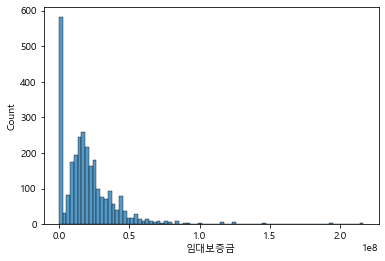

In [440]:
sns.histplot(train_df["임대보증금"])

In [ ]:
# sns.histplot(train_df["log_임대보증금"])

In [444]:
from sklearn.preprocessing import MinMaxScaler ### 정규화

In [496]:
sel = [ '총세대수', '전용면적', '공가수', '단지내주차면수',
       'qcut_총세대수', '자격유형', '전용면적별세대수', '버스',
       '지하철', '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl',
       '단지코드_Type','qcut_단지내주차면수', '임대보증금', '임대료']

# 성준님
# sel = [ '총세대수', '전용면적', '공가수', '단지내주차면수','임대보증금','임대료',
#         '전용면적별세대수',  '단지코드_lbl']

# sel = [ '총세대수', '전용면적', '공가수', '단지내주차면수','임대보증금','임대료',
#        'qcut_총세대수', '전용면적별세대수', '버스', '공급유형_lbl', '지역_lbl', 
#        '단지코드_lbl', '자격유형','임대건물구분_lbl','지하철', '단지코드_Type']


lable_name = 'log_등록차량수'

X = train_df[sel]
y = train_df[lable_name]

test_X = test_df[sel]

scaler = MinMaxScaler()
scaler.fit(X)
nor_X = scaler.transform(X)

test_X = scaler.transform(test_X)

X_train, X_test, y_train, y_test = train_test_split(nor_X, y,
                                                    test_size=0.1,
                                                    random_state=0)

In [497]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#import xgboost as xgb
#import lightgbm as lgb

In [498]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("학습(score) :", model.score(X_train, y_train) ) # 결정계수
print("테스트(score) :", model.score(X_test, y_test) ) # 결정계수

학습(score) : 0.9988279028294453
테스트(score) : 0.9969559628686925


In [499]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("학습(score) :", model.score(X_train, y_train) ) # 결정계수
print("테스트(score) :", model.score(X_test, y_test) ) # 결정계수

학습(score) : 0.9586043901892941
테스트(score) : 0.9552441569359209


### 교차검증

In [500]:
import time

### RandomForest 모델

In [501]:
now_time = time.time()

model_RF = RandomForestRegressor(n_estimators = 1000, 
                                 random_state=0, n_jobs=-1)
model_RF.fit(X_train, y_train)
score = cross_val_score(model_RF, X_train, y_train, 
                        cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
m_score = np.abs(score.mean())
print("RandomForestRegressor Score : {}".format(m_score))  # 점수

pro_time = time.time() - now_time
print(pro_time)  # 걸린 시간

RandomForestRegressor Score : 0.037438606145578944
20.805610179901123


### GradientBoosting 모델

In [502]:
now_time = time.time()

# model = GradientBoostingRegressor(n_estimators = 1000,
#                                  random_state=0)
model = GradientBoostingRegressor(n_estimators = 5000,
                                 random_state=0)
model.fit(X_train, y_train)
score = cross_val_score(model, X_train, y_train,
                        cv=10, scoring="neg_mean_absolute_error") # neg_mean_squared_error
m_score = np.abs(score.mean())
print("GradientBoostingRegressor Score : {}".format(m_score))  # 점수

pro_time = time.time() - now_time
print(pro_time)  # 걸린 시간

GradientBoostingRegressor Score : 0.022443415892257842
222.3695695400238


In [503]:
pred = model.predict(test_X)
pred

array([6.34250437, 6.39759314, 6.39946897, ..., 5.0189246 , 5.02568131,
       4.95044446])

In [471]:
# 성준님
# now_time = time.time()

# model_last =  GradientBoostingRegressor(n_estimators = 5000, random_state=0)
# model_last.fit(X_train, y_train)
# pred = model_last.predict(test_X)
# pred[0:10]

### LGBM 모델

In [508]:
import lightgbm as lgb

hyperparameters = {'boosting_type': 'gbdt',
                   'colsample_bytree': 0.7250136792694301,
                   'is_unbalance': False,
                   'learning_rate': 0.05,
                   'min_child_samples': 20,
                   'num_leaves': 56,
                   'subsample': 0.5233384321711397,
                   'n_estimators': 5000}

In [509]:
now_time = time.time()

m_lgbm1 = lgb.LGBMRegressor(**hyperparameters)
m_lgbm1.fit(X_train, y_train)
score = cross_val_score(m_lgbm1, X_train, y_train,
                        cv=5, scoring="neg_mean_absolute_error")

m_score = np.abs(score.mean())  # 절대값
pro_time = time.time() - now_time

print(pro_time)  # 걸린 시간
print("LightGBM Score : {}".format(m_score))  # 점수

42.428730487823486
LightGBM Score : 0.03141567350650519


lightgbm 모델 생성 및 학습 그리고 교차검증 평가 확인.

### 최종모델

In [511]:
# model_last = RandomForestRegressor(n_estimators = 1000,
#                                  random_state=0, n_jobs=-1)
# model_last.fit(X_train, y_train)

m_lgbm1 = lgb.LGBMRegressor(**hyperparameters)
m_lgbm1.fit(X_train, y_train)
pred = m_lgbm1.predict(test_X)
pred[0:10]

array([6.60495006, 6.5735156 , 6.57829288, 6.57744326, 6.56719978,
       6.56730301, 6.55510242, 6.56866147, 7.10000573, 7.09867569])

In [520]:
from sklearn.linear_model import Ridge

r_model = Ridge()
r_model.fit(X_train, y_train)
pred = r_model.predict(test_X)


In [521]:
# model = GradientBoostingRegressor(n_estimators = 5000,
#                                  random_state=0)
# model.fit(X_train, y_train)
# pred = model.predict(test_X)

In [522]:
# 모델 선택 및 제출용 파일을 위한 '단지별차량수평균 '특징 추가
test_df['등록차량수'] = np.expm1(pred)
test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test_df.drop_duplicates(['단지코드'], keep='first').reset_index() # 중복 제거
test_new

<ipython-input-522-a9e30070e5a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['등록차량수'] = np.expm1(pred)
<ipython-input-522-a9e30070e5a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)


,index,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지내주차면수_lbl,qcut_단지내주차면수,단지코드_Type,등록차량수,단지별차량수평균
0,0,C1072,754,35.0,116,14.0,8,22830000.0,189840.0,0.0,2.0,683.0,1,3,1,32,2,276,3,3.0,559.902644,612.368182
1,8,C1128,1354,35.0,368,9.0,8,22830000.0,189840.0,0.0,3.0,1216.0,1,3,1,43,4,416,4,3.0,1063.668414,1207.513940
2,17,C1456,619,30.0,82,18.0,1,19706000.0,156200.0,0.0,16.0,547.0,1,8,1,143,1,215,2,3.0,555.997670,597.695704
3,26,C1840,593,35.0,253,7.0,1,14418000.0,108130.0,0.0,3.0,543.0,1,4,1,263,1,212,2,3.0,414.649258,430.177394
4,30,C1332,1297,35.0,282,11.0,8,28598000.0,203050.0,0.0,2.0,1112.0,1,3,1,110,4,399,4,3.0,991.475769,1098.185331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,982,C2456,349,25.0,24,17.0,8,6992000.0,117000.0,0.0,4.0,270.0,1,9,1,471,0,82,1,1.0,242.366296,248.685864
143,986,C1266,596,25.0,164,35.0,8,8084000.0,149910.0,0.0,1.0,593.0,1,11,1,85,1,235,2,1.0,353.787877,373.325357
144,991,C2152,120,20.0,66,9.0,3,0.0,0.0,0.0,1.0,40.0,1,5,3,369,0,5,0,3.0,150.541888,151.022224
145,993,C1267,675,20.0,28,38.0,8,6882000.0,104370.0,0.0,1.0,467.0,1,1,1,86,2,177,2,1.0,270.235404,243.144782


In [523]:
add_dat = {'code':['C2675', 'C2335', 'C1327'],
           'num':['0', '0', '0']}
add_df = pd.DataFrame(add_dat)

In [524]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df = pd.concat([sub_df, add_df]).reset_index()
sub_df = sub_df.drop(['index'], axis=1)
sub_df

,code,num
0,C1072,612.368
1,C1128,1207.51
2,C1456,597.696
3,C1840,430.177
4,C1332,1098.19
...,...,...
145,C1267,243.145
146,C2189,190.289
147,C2675,0
148,C2335,0


In [525]:
sub_df.to_csv('0723_base_line_03.csv', index=False)
sub_df.head()

,code,num
0,C1072,612.368
1,C1128,1207.51
2,C1456,597.696
3,C1840,430.177
4,C1332,1098.19
